<a href="https://colab.research.google.com/github/farfaness/dimension_reduction_and_clutering/blob/master/pca_decathlon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Ce jeu de données contient 41 entrées, qui décrivent chacune les performances d'un athlète à une compétition de décathlon. Nous allons faire une ACP des dix variables décrivant les performances à chacune des épreuves du décathlon (100 mètres, saut en hauteur, lancer de poids, saut en hauteur, 400 mètres, 110 mètres haies, lancer de disque, saut à la perche, javelot, et 1500 mètres).

source : https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379506-tp-acp-d-un-jeu-de-donnees-sur-les-performances-d-athletes-olympiques

# Lecture du fichier et standard scaler

In [0]:
import pandas as pd
from sklearn import preprocessing

In [0]:
# To download the dataset from my google drive : mout my drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
cd '/content/drive/My Drive/reduction_dimension_et_clustering'

/content/drive/My Drive/reduction_dimension_et_clustering


In [3]:
ls

bag_of_words.csv                   mystery.csv
courses_info.csv                   pca_decathlon.ipynb
decathlon.txt                      Principal_Components_Analysis.ipynb
hierarchical_classification.ipynb  slide_detector_PCA_Kmeans_CH.ipynb
my_courses.csv                     video.csv


In [0]:
# charger les données
data = pd.read_csv('/content/drive/My Drive/reduction_dimension_et_clustering/decathlon.txt', sep="\t")

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

In [0]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# ACP

In [0]:
from sklearn import decomposition
import matplotlib.pyplot as plt

In [6]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(pca.explained_variance_ratio_) # Pourcentage de variance expliquée pour chacune des composantes
print(pca.explained_variance_ratio_.sum()) # Pourcentage cumulé

[0.32719055 0.1737131 ]
0.5009036561090068


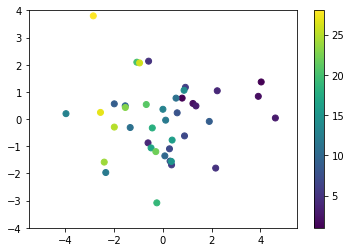

In [14]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.get('Rank'))

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

# Contribution de chaque variables aux composantes

(-0.7, 0.7)

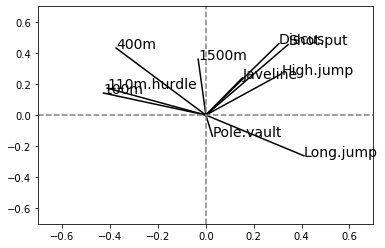

In [15]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

La première composante permet de séparer les athlètes qui ont de très bonnes performances de ceux qui sont (relativement !) plus mauvais dans toutes les disciplines, comme nous l'avions remarqué.

La deuxième composante principale permet de séparer les athlètes plus forts (bonnes performances aux lancers) et moins endurants (basse performance aux 400m et 1500m) des autres.